In [2]:
# import dependecies 
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np 
from citipy import citipy
from datetime import datetime 
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [3]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [4]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

621

In [6]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=492532aee06bc76badf06766a9613397


In [7]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1
# Loop through all the cities in our list.
for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + "i"

    # Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 13 | vaini
Processing Record 2 of Set 13 | mataura
Processing Record 3 of Set 13 | saeby
Processing Record 4 of Set 13 | victoria
Processing Record 5 of Set 13 | progreso
Processing Record 6 of Set 13 | muhos
Processing Record 7 of Set 13 | busselton
Processing Record 8 of Set 13 | rikitea
Processing Record 9 of Set 13 | severo-kurilsk
Processing Record 10 of Set 13 | garden city
Processing Record 11 of Set 13 | lavrentiya
Processing Record 12 of Set 13 | bethel
Processing Record 13 of Set 13 | puerto carreno
Processing Record 14 of Set 13 | lagoa
Processing Record 15 of Set 13 | bulgan
Processing Record 16 of Set 13 | pa daet
Processing Record 17 of Set 13 | ushuaia
Processing Record 18 of Set 13 | kampene
Processing Record 19 of Set 13 | dikson
Processing Record 20 of Set 13 | jamestown
Processing Record 21 of Set 13 | longyearbyen
Processing Record 22 of Set 13 | tasiilaq
Processing Record 23 of S

Processing Record 36 of Set 16 | vila franca do campo
Processing Record 37 of Set 16 | batagay-alyta
Processing Record 38 of Set 16 | yaremche
Processing Record 39 of Set 16 | new norfolk
Processing Record 40 of Set 16 | providencia
Processing Record 41 of Set 16 | travesia
Processing Record 42 of Set 16 | vanavara
Processing Record 43 of Set 16 | huilong
Processing Record 44 of Set 16 | saint-leu
Processing Record 45 of Set 16 | avera
Processing Record 46 of Set 16 | sorvag
City not found. Skipping...
Processing Record 47 of Set 16 | chokwe
Processing Record 48 of Set 16 | verkhnyaya inta
Processing Record 49 of Set 16 | yuzhno-kurilsk
Processing Record 50 of Set 16 | camacha
Processing Record 1 of Set 17 | egvekinot
Processing Record 2 of Set 17 | burica
City not found. Skipping...
Processing Record 3 of Set 17 | boa vista
Processing Record 4 of Set 17 | castro
Processing Record 5 of Set 17 | kruisfontein
Processing Record 6 of Set 17 | miri
Processing Record 7 of Set 17 | kahului
Pr

Processing Record 24 of Set 20 | touros
Processing Record 25 of Set 20 | tazovskiy
Processing Record 26 of Set 20 | nacala
Processing Record 27 of Set 20 | mullaitivu
City not found. Skipping...
Processing Record 28 of Set 20 | bonavista
Processing Record 29 of Set 20 | grindavik
Processing Record 30 of Set 20 | otukpo
Processing Record 31 of Set 20 | nastola
Processing Record 32 of Set 20 | menongue
Processing Record 33 of Set 20 | paamiut
Processing Record 34 of Set 20 | solano
Processing Record 35 of Set 20 | ishigaki
Processing Record 36 of Set 20 | meadow lake
Processing Record 37 of Set 20 | sioux lookout
Processing Record 38 of Set 20 | mogadishu
Processing Record 39 of Set 20 | viedma
Processing Record 40 of Set 20 | copiapo
Processing Record 41 of Set 20 | micheweni
Processing Record 42 of Set 20 | hanna
Processing Record 43 of Set 20 | maningrida
Processing Record 44 of Set 20 | veinticinco de mayo
Processing Record 45 of Set 20 | nome
Processing Record 46 of Set 20 | kolar
P

Processing Record 12 of Set 24 | tabas
Processing Record 13 of Set 24 | auki
Processing Record 14 of Set 24 | la rochelle
Processing Record 15 of Set 24 | diamantino
Processing Record 16 of Set 24 | esmeraldas
Processing Record 17 of Set 24 | bairiki
Processing Record 18 of Set 24 | bila tserkva
Processing Record 19 of Set 24 | sangar
Processing Record 20 of Set 24 | russell
Processing Record 21 of Set 24 | ye
City not found. Skipping...
Processing Record 22 of Set 24 | muyezerskiy
Processing Record 23 of Set 24 | teya
Processing Record 24 of Set 24 | dunedin
Processing Record 25 of Set 24 | bundaberg
Processing Record 26 of Set 24 | ossora
Processing Record 27 of Set 24 | yekaterinovka
Processing Record 28 of Set 24 | manado
Processing Record 29 of Set 24 | palmas bellas
Processing Record 30 of Set 24 | flinders
Processing Record 31 of Set 24 | caxito
Processing Record 32 of Set 24 | nouakchott
Processing Record 33 of Set 24 | hasaki
Processing Record 34 of Set 24 | kapoeta
Processing

In [9]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Vaini,-21.20,-175.20,78.80,83,75,8.05,TO,2020-09-01 05:25:59
1,Mataura,-46.19,168.86,45.00,72,49,11.01,NZ,2020-09-01 05:24:59
2,Saeby,57.33,10.52,44.01,94,0,4.81,DK,2020-09-01 05:25:59
3,Victoria,22.29,114.16,93.20,59,20,6.93,HK,2020-09-01 05:21:12
4,Progreso,21.28,-89.67,84.20,79,40,11.41,MX,2020-09-01 05:25:59
5,Muhos,64.81,25.99,46.40,93,3,2.24,FI,2020-09-01 05:26:00
6,Busselton,-33.65,115.33,55.00,81,37,5.01,AU,2020-09-01 05:26:00
7,Rikitea,-23.12,-134.97,68.59,85,72,19.30,PF,2020-09-01 05:23:05
8,Severo-Kurilsk,50.68,156.12,53.06,69,85,6.69,RU,2020-09-01 05:26:01
9,Garden City,42.33,-83.33,69.01,82,90,4.88,US,2020-09-01 05:26:03


In [10]:
new_column_order = ["City", "Country", "Date", "Lat","Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"  ]
city_data_df = city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Vaini,TO,2020-09-01 05:25:59,-21.20,-175.20,78.80,83,75,8.05
1,Mataura,NZ,2020-09-01 05:24:59,-46.19,168.86,45.00,72,49,11.01
2,Saeby,DK,2020-09-01 05:25:59,57.33,10.52,44.01,94,0,4.81
3,Victoria,HK,2020-09-01 05:21:12,22.29,114.16,93.20,59,20,6.93
4,Progreso,MX,2020-09-01 05:25:59,21.28,-89.67,84.20,79,40,11.41
...,...,...,...,...,...,...,...,...,...
578,Byron Bay,AU,2020-09-01 05:27:16,-28.65,153.62,66.99,77,75,16.11
579,Jha Jha,IN,2020-09-01 05:31:30,24.77,86.37,91.38,58,99,8.50
580,Rapar,IN,2020-09-01 05:31:31,23.57,70.63,84.88,69,90,14.81
581,Coper,CO,2020-09-01 05:31:33,5.48,-74.04,67.32,68,96,5.53


In [11]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [12]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [14]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.strftime("%x")

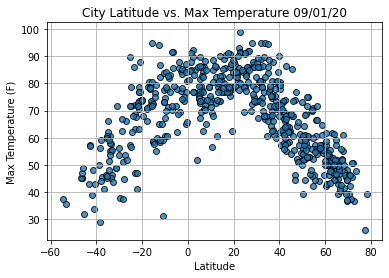

In [15]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

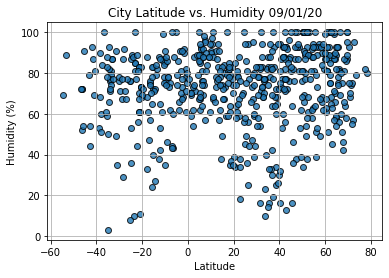

In [16]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

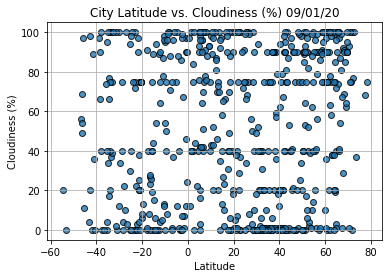

In [17]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()